# Mimic the following CNN architecture to work on the MNIST dataset

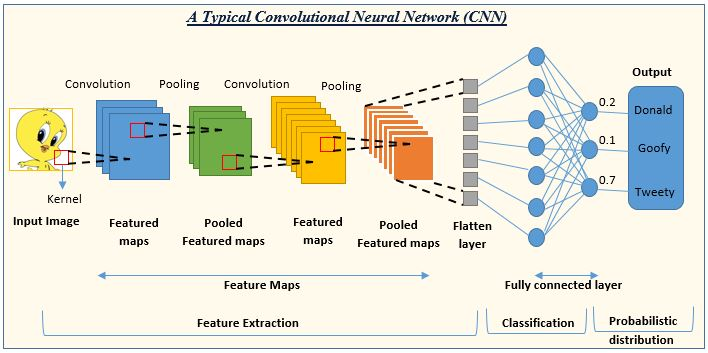

In [19]:
# newer version of tensorflow might not need this
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disable warnings

import cv2
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_hub as hub

# Generating Seed
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # TF 2.1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("NP version:", np.__version__)
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

NP version: 1.26.2
TF version: 2.15.0
Hub version: 0.15.0
GPU available (YESS!!!!)


In [20]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [21]:
len(train_images), len(test_images)

(60000, 10000)

In [22]:
# 28 x 28
len(train_images[0]), len(train_images[0][0]), train_images[0]

(28,
 28,
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
  

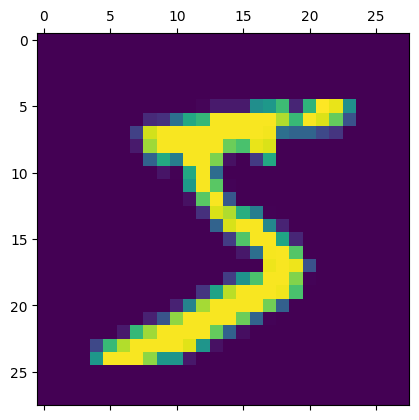

In [23]:
plt.matshow(train_images[0])

In [24]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images[0][:25]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
# Expand dimensions of the images to (28, 28, 1) as Keras expects images in 3D
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [26]:
train_images.shape, train_images[0]

((60000, 28, 28, 1),
 array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [

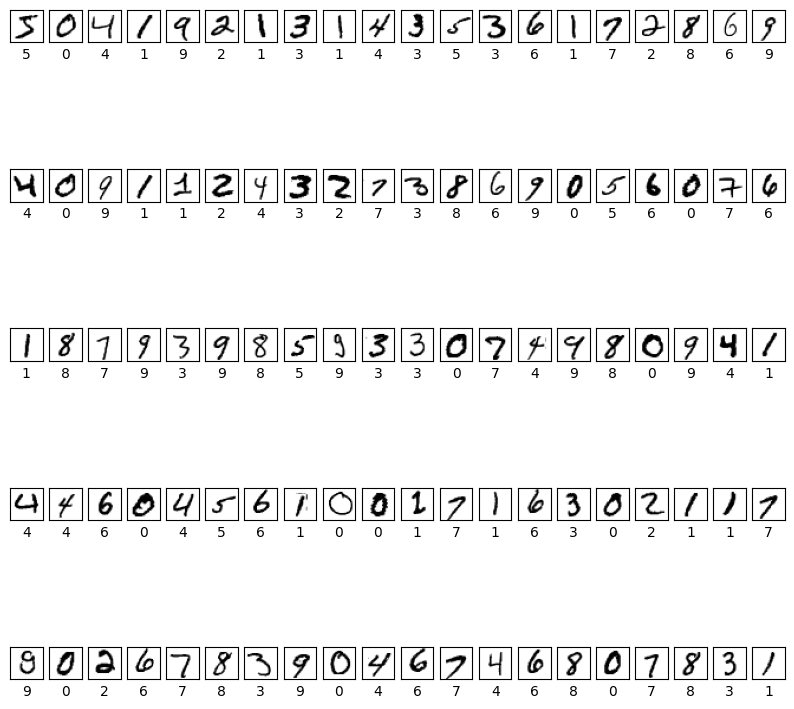

In [56]:
# Plot the pixels
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


# CNN Model

In [28]:
model = models.Sequential([
    # Feature Maps layers for feature extractions
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    
    # Fully connected layers for classification
    layers.Dense(64, activation='relu'),
    # Sine there are only 10 numbers make sense to have 10 neurons for 0-9
    layers.Dense(10, activation='softmax')
])


In [29]:
# Define Custom Metric for Precision and Recall
def sparse_categorical_precision(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def sparse_categorical_recall(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall


In [30]:
# Compile the model with the appropriate loss function, optimizer, and metrics.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
        sparse_categorical_precision,
        sparse_categorical_recall
    ]
)

# Train / Fit the model

In [31]:
history = model.fit(
    train_images,
    train_labels,
    epochs=25,
    # validation_data=(test_images, test_labels),
    validation_split=0.1
)

Epoch 1/25
1688/1688 [==============================] - 10s 5ms/step - loss: 0.1556 - accuracy: 0.9523 - sparse_categorical_precision: 15313982.0000 - sparse_categorical_recall: 1.1874 - val_loss: 0.0435 - val_accuracy: 0.9885 - val_sparse_categorical_precision: 0.9435 - val_sparse_categorical_recall: 1.0428
Epoch 2/25
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0487 - accuracy: 0.9849 - sparse_categorical_precision: 0.9457 - sparse_categorical_recall: 1.0456 - val_loss: 0.0385 - val_accuracy: 0.9887 - val_sparse_categorical_precision: 0.9298 - val_sparse_categorical_recall: 1.0289
Epoch 3/25
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0354 - accuracy: 0.9891 - sparse_categorical_precision: 0.9323 - sparse_categorical_recall: 1.0323 - val_loss: 0.0332 - val_accuracy: 0.9905 - val_sparse_categorical_precision: 0.9238 - val_sparse_categorical_recall: 1.0222
Epoch 4/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0257 - a

# Evaluate the model

In [33]:
loss, accuracy, precision, recall = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {accuracy}')
print(f'Test precision: {precision}')
print(f'Test recall(sensitivity): {recall}')

313/313 - 1s - loss: 0.0519 - accuracy: 0.9920 - sparse_categorical_precision: 0.9092 - sparse_categorical_recall: 1.0077 - 866ms/epoch - 3ms/step
Test accuracy: 0.9919999837875366
Test precision: 0.9092323184013367
Test recall(sensitivity): 1.00771963596344


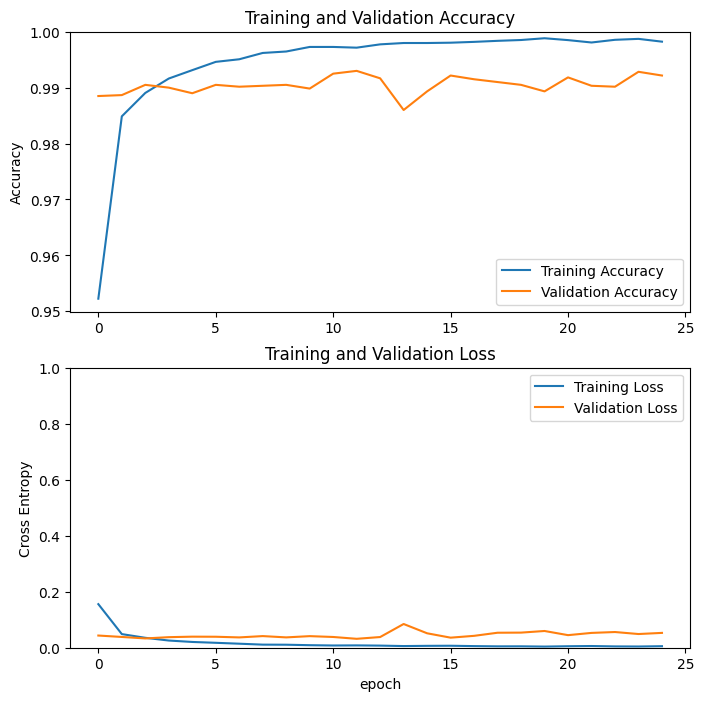

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Accuracy for the test data is above 98% and lost also decreases in training

313/313 [==============================] - 1s 2ms/step


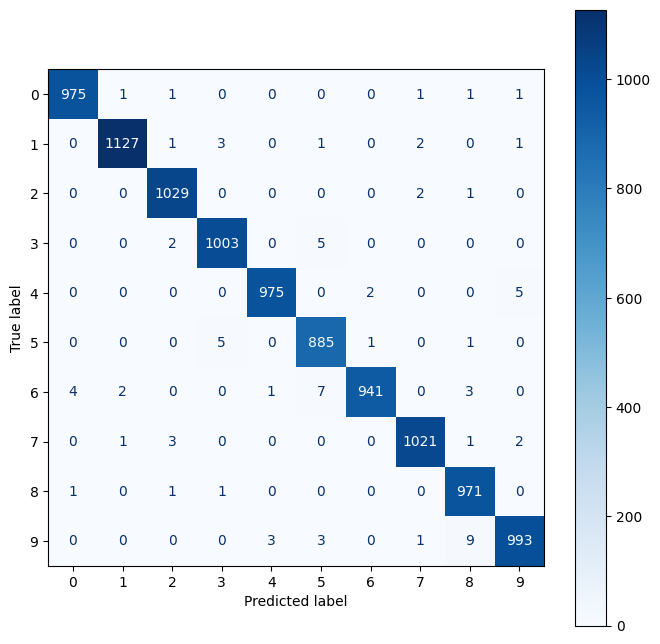

In [36]:
# Predict the values from the test dataset
test_pred_raw = model.predict(test_images)
test_pred = np.argmax(test_pred_raw, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

# Save the model

In [37]:
model.save('MNIST.keras')

# Load the Model

In [38]:
from tensorflow.keras.models import load_model

custom_objects={
  'sparse_categorical_precision': sparse_categorical_precision,
  'sparse_categorical_recall': sparse_categorical_recall
}

loaded_model = load_model('MNIST.keras', custom_objects=custom_objects)

In [39]:
# process image with opencv
def preprocess_image_cv(image_path, target_size=(28, 28)):
    """
    Preprocess an input image to be suitable for a machine learning model using OpenCV.
    
    Parameters:
    - image_path: The file path of the input image.
    - target_size: The desired size (width, height) as a tuple. Default is (28, 28).
    
    Returns:
    A preprocessed image as a NumPy array.
    """
    # Read the image from the file
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    
    if image is None:
        raise ValueError("Image not found or the path is incorrect.")
    
    # Resize the image to the target size
    image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
    
    # Normalize pixel values to be between 0 and 1
    image = image / 255.0
    
    # Convert the image to the right type (float32)
    image = image.astype(np.float32)
    
    # Expand dimensions to match the shape that the model expects (if needed)
    image = np.expand_dims(image, axis=-1)  # For channel dimension
    image = np.expand_dims(image, axis=0)   # For batch size
    
    # return image[..., tf.newaxis]
    return image

In [52]:
image_path = './3.jpg'
preprocessed_image = preprocess_image_cv(image_path)

In [53]:
preprocessed_image.shape, preprocessed_image

((1, 28, 28, 1),
 array([[[[0.5529412 ],
          [0.54901963],
          [0.54509807],
          [0.54509807],
          [0.5411765 ],
          [0.54509807],
          [0.54509807],
          [0.5568628 ],
          [0.5568628 ],
          [0.56078434],
          [0.5568628 ],
          [0.5568628 ],
          [0.56078434],
          [0.57254905],
          [0.5803922 ],
          [0.5803922 ],
          [0.5803922 ],
          [0.5803922 ],
          [0.58431375],
          [0.58431375],
          [0.5882353 ],
          [0.5921569 ],
          [0.59607846],
          [0.6       ],
          [0.6039216 ],
          [0.6117647 ],
          [0.6117647 ],
          [0.6313726 ]],
 
         [[0.5294118 ],
          [0.5372549 ],
          [0.5411765 ],
          [0.54509807],
          [0.5411765 ],
          [0.54509807],
          [0.54901963],
          [0.5568628 ],
          [0.5529412 ],
          [0.5568628 ],
          [0.5686275 ],
          [0.5686275 ],
          [0.5647059

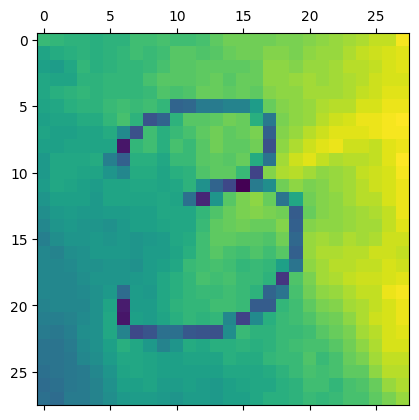

In [50]:
plt.matshow(preprocessed_image[0])

In [55]:
# Predict using the model
predictions = loaded_model.predict(preprocessed_image)

# Process predictions as needed
predicted_class = np.argmax(predictions, axis=1)
print(f'The model predicts this image to be class: {predicted_class}')

1/1 [==============================] - 0s 16ms/step
The model predicts this image to be class: [1]


# With Multiple images`

In [44]:
def preprocess_images_cv(image_paths, target_size=(28, 28)):
    preprocessed_images = []
    
    for image_path in image_paths:
        # Read the image from the file
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        
        if image is None:
            raise ValueError(f"Image at path {image_path} not found or the path is incorrect.")
        
        # Resize the image to the target size
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
        
        # Normalize pixel values to be between 0 and 1
        image = image / 255.0
        
        # Convert the image to the right type (float32)
        image = image.astype(np.float32)
        
        # Expand dimensions to match the shape that the model expects
        image = np.expand_dims(image, axis=-1)  # For channel dimension
        
        preprocessed_images.append(image)
    
    # Stack images to create batch
    preprocessed_images = np.stack(preprocessed_images, axis=0)
    return preprocessed_images


In [45]:
def plot_images_with_predictions(image_paths, model):
    """
    Preprocess multiple images, make predictions using the provided model, and plot each image with its predicted label.
    
    Parameters:
    - image_paths: A list of file paths for the input images.
    - model: The trained TensorFlow/Keras model.
    """
    # Preprocess the images
    preprocessed_images = preprocess_images_cv(image_paths)
    
    # Make predictions
    predictions = model.predict(preprocessed_images)
    
    # Convert predictions to class labels
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Number of images
    num_images = len(image_paths)
    
    # Plot each image with its prediction
    plt.figure(figsize=(10, 2 * num_images))  # Adjust size as needed
    for i, image_path in enumerate(image_paths):
        plt.subplot(num_images, 1, i + 1)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(image, cmap='gray')
        plt.title(f'Predicted Class: {predicted_classes[i]}')
        plt.axis('off')  # Hide the axis
    plt.tight_layout()
    plt.show()


(6, 28, 28, 1)
1/1 [==============================] - 0s 33ms/step


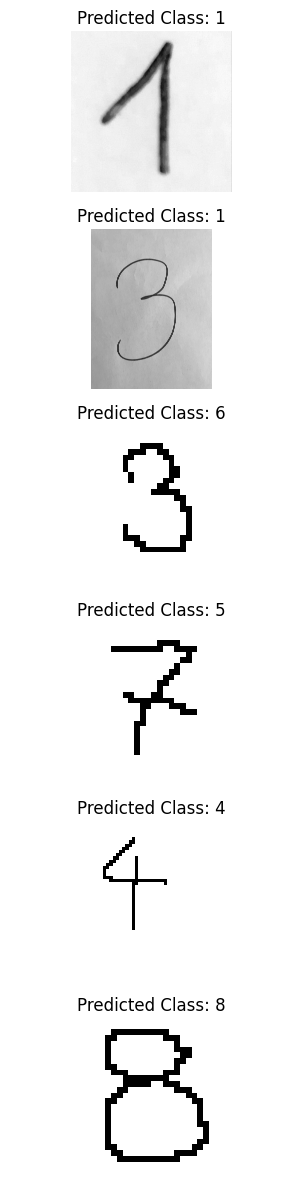

In [61]:
# Define your list of image paths and your model
image_paths = ['1.jpg', '3.jpg', '3.png', '7.png', '4.png', '8.png']
# Make sure your model is loaded or defined here
# model = ...

print(preprocess_images_cv(image_paths).shape)
# Plot the images with the predictions
plot_images_with_predictions(image_paths, loaded_model)

# Look it the prediction work best with 28 x 28 pixels. It need to be train with thin line and bigger picture to reduce loss